# WeatherPy
----


In [134]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [135]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls



In [137]:
city_df = pd.DataFrame({'City' : cities})
city_df['Latitude'] = ""
city_df['Longitude'] = ""
city_df['Max Temp'] = ""
city_df['Humidity'] = ""
city_df['Cloudiness'] = ""
city_df['Wind Speed'] = ""
city_df['Country'] = ""
city_df['Date'] = ""

base_url = "http://api.openweathermap.org/data/2.5/weather?"

for index, row in city_df.iterrows():
    city_name = row['City']
    
    params = {
    "q": {city_name},
    "appid" : weather_api_key,
    "units" : "imperial"
    }
    
    print(f"Retrieving Results for Index {index}: {city_name}.")
    
    cities_response = requests.get(base_url, params=params).json()
    time.sleep(1)
    
    try:
        print(f"Current wind speed in {city_name} is {cities_response['wind']['speed']}.")
        
        city_df.loc[index, 'Latitude'] = cities_response['coord']['lat']
        city_df.loc[index, 'Longitude'] = cities_response['coord']['lon']
        city_df.loc[index, 'Max Temp'] = cities_response['main']['temp_max']
        city_df.loc[index, 'Humidity'] = cities_response['main']['humidity']
        city_df.loc[index, 'Cloudiness'] = cities_response['clouds']['all']
        city_df.loc[index, 'Wind Speed'] = cities_response['wind']['speed']
        city_df.loc[index, 'Country'] = cities_response['sys']['country']
        city_df.loc[index, 'Date'] = cities_response['dt']
     
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
city_df.head()


Retrieving Results for Index 0: rosarito.
Current wind speed in rosarito is 8.05.
Retrieving Results for Index 1: san ramon.
Current wind speed in san ramon is 1.01.
Retrieving Results for Index 2: ushuaia.
Current wind speed in ushuaia is 4.81.
Retrieving Results for Index 3: saskylakh.
Current wind speed in saskylakh is 9.93.
Retrieving Results for Index 4: kruisfontein.
Current wind speed in kruisfontein is 3.04.
Retrieving Results for Index 5: conceicao do araguaia.
Current wind speed in conceicao do araguaia is 0.81.
Retrieving Results for Index 6: hobart.
Current wind speed in hobart is 2.73.
Retrieving Results for Index 7: codrington.
Current wind speed in codrington is 8.99.
Retrieving Results for Index 8: new norfolk.
Current wind speed in new norfolk is 2.13.
Retrieving Results for Index 9: tiksi.
Current wind speed in tiksi is 15.52.
Retrieving Results for Index 10: busselton.
Current wind speed in busselton is 10.
Retrieving Results for Index 11: mataura.
Current wind speed

Current wind speed in longyearbyen is 5.82.
Retrieving Results for Index 100: mahebourg.
Current wind speed in mahebourg is 5.01.
Retrieving Results for Index 101: pasaco.
Current wind speed in pasaco is 1.52.
Retrieving Results for Index 102: dibulla.
Current wind speed in dibulla is 4.5.
Retrieving Results for Index 103: mackay.
Current wind speed in mackay is 1.45.
Retrieving Results for Index 104: koupela.
Current wind speed in koupela is 4.12.
Retrieving Results for Index 105: fortuna.
Current wind speed in fortuna is 12.75.
Retrieving Results for Index 106: cam ranh.
Current wind speed in cam ranh is 4.23.
Retrieving Results for Index 107: hazorasp.
Current wind speed in hazorasp is 10.58.
Retrieving Results for Index 108: attawapiskat.
Missing field/result... skipping.
Retrieving Results for Index 109: vallenar.
Current wind speed in vallenar is 4.52.
Retrieving Results for Index 110: belmonte.
Current wind speed in belmonte is 10.85.
Retrieving Results for Index 111: henties ba

Current wind speed in barrow is 7.07.
Retrieving Results for Index 198: gao.
Current wind speed in gao is 6.17.
Retrieving Results for Index 199: toropets.
Current wind speed in toropets is 8.95.
Retrieving Results for Index 200: abu zabad.
Current wind speed in abu zabad is 8.23.
Retrieving Results for Index 201: abu samrah.
Current wind speed in abu samrah is 4.85.
Retrieving Results for Index 202: birjand.
Current wind speed in birjand is 6.53.
Retrieving Results for Index 203: saleaula.
Missing field/result... skipping.
Retrieving Results for Index 204: severo-kurilsk.
Current wind speed in severo-kurilsk is 8.1.
Retrieving Results for Index 205: halalo.
Missing field/result... skipping.
Retrieving Results for Index 206: saint anthony.
Current wind speed in saint anthony is 4.7.
Retrieving Results for Index 207: boffa.
Current wind speed in boffa is 3.53.
Retrieving Results for Index 208: paamiut.
Current wind speed in paamiut is 14.09.
Retrieving Results for Index 209: boyuibe.
Cu

Current wind speed in ormond beach is 11.99.
Retrieving Results for Index 297: khonuu.
Missing field/result... skipping.
Retrieving Results for Index 298: russell.
Current wind speed in russell is 1.01.
Retrieving Results for Index 299: santa catarina de tepehuanes.
Current wind speed in santa catarina de tepehuanes is 7.9.
Retrieving Results for Index 300: lompoc.
Current wind speed in lompoc is 11.01.
Retrieving Results for Index 301: karkaralinsk.
Missing field/result... skipping.
Retrieving Results for Index 302: batouri.
Current wind speed in batouri is 1.16.
Retrieving Results for Index 303: staraya mayna.
Current wind speed in staraya mayna is 9.91.
Retrieving Results for Index 304: busia.
Current wind speed in busia is 2.37.
Retrieving Results for Index 305: porto franco.
Current wind speed in porto franco is 3.4.
Retrieving Results for Index 306: juneau.
Current wind speed in juneau is 1.99.
Retrieving Results for Index 307: ribeira grande.
Current wind speed in ribeira grande

Current wind speed in sechelt is 19.46.
Retrieving Results for Index 395: fairbanks.
Current wind speed in fairbanks is 2.77.
Retrieving Results for Index 396: touros.
Current wind speed in touros is 13.2.
Retrieving Results for Index 397: umzimvubu.
Missing field/result... skipping.
Retrieving Results for Index 398: walvis bay.
Current wind speed in walvis bay is 3.
Retrieving Results for Index 399: mount isa.
Current wind speed in mount isa is 12.01.
Retrieving Results for Index 400: hede.
Current wind speed in hede is 6.53.
Retrieving Results for Index 401: poum.
Current wind speed in poum is 22.37.
Retrieving Results for Index 402: san ramon de la nueva oran.
Current wind speed in san ramon de la nueva oran is 5.7.
Retrieving Results for Index 403: kondagaon.
Current wind speed in kondagaon is 1.3.
Retrieving Results for Index 404: northam.
Current wind speed in northam is 11.01.
Retrieving Results for Index 405: presidencia roque saenz pena.
Current wind speed in presidencia roque

Current wind speed in kiunga is 1.05.
Retrieving Results for Index 492: puri.
Current wind speed in puri is 10.29.
Retrieving Results for Index 493: comodoro rivadavia.
Current wind speed in comodoro rivadavia is 8.43.
Retrieving Results for Index 494: verkhnevilyuysk.
Current wind speed in verkhnevilyuysk is 2.48.
Retrieving Results for Index 495: myitkyina.
Current wind speed in myitkyina is 2.24.
Retrieving Results for Index 496: sal rei.
Current wind speed in sal rei is 16.4.
Retrieving Results for Index 497: rio gallegos.
Current wind speed in rio gallegos is 34.49.
Retrieving Results for Index 498: oranjemund.
Current wind speed in oranjemund is 3.76.
Retrieving Results for Index 499: unai.
Current wind speed in unai is 2.51.
Retrieving Results for Index 500: sakakah.
Current wind speed in sakakah is 2.37.
Retrieving Results for Index 501: manta.
Current wind speed in manta is 12.53.
Retrieving Results for Index 502: ukiah.
Current wind speed in ukiah is 5.57.
Retrieving Results 

Current wind speed in viedma is 1.99.
Retrieving Results for Index 591: ponta delgada.
Current wind speed in ponta delgada is 10.78.
Retrieving Results for Index 592: lianzhou.
Current wind speed in lianzhou is 3.78.
Retrieving Results for Index 593: hualmay.
Current wind speed in hualmay is 9.42.
Retrieving Results for Index 594: totskoye.
Current wind speed in totskoye is 4.63.
Retrieving Results for Index 595: dubbo.
Current wind speed in dubbo is 5.77.
Retrieving Results for Index 596: nkhotakota.
Current wind speed in nkhotakota is 10.8.
Retrieving Results for Index 597: caronport.
Current wind speed in caronport is 1.99.
Retrieving Results for Index 598: pabrade.
Current wind speed in pabrade is 8.05.


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rosarito,32.33,-117.03,73.4,28,1,8.05,MX,1603930483
1,san ramon,37.78,-121.98,75,26,0,1.01,US,1603930484
2,ushuaia,-54.8,-68.3,39.27,86,51,4.81,AR,1603930037
3,saskylakh,71.92,114.08,2.7,90,97,9.93,RU,1603930327
4,kruisfontein,-34,24.73,61,93,67,3.04,ZA,1603930487


In [138]:
len(city_df)

599

### Convert Raw Data to DataFrame


In [139]:
city_df.set_index('City')
city_df.to_csv("Output File/city_data.csv")
city_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rosarito,32.33,-117.03,73.4,28,1,8.05,MX,1603930483
1,san ramon,37.78,-121.98,75,26,0,1.01,US,1603930484
2,ushuaia,-54.8,-68.3,39.27,86,51,4.81,AR,1603930037
3,saskylakh,71.92,114.08,2.7,90,97,9.93,RU,1603930327
4,kruisfontein,-34,24.73,61,93,67,3.04,ZA,1603930487


## Inspect the data and remove the cities where the humidity > 100%.
----


In [140]:
#check to see if cities with humidity of 100+ exist
city_data.loc[city_data['Humidity'] >= 100]

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,esperance,-33.87,121.90,57.20,100.0,90.0,9.17,AU,1.602704e+09
9,hambantota,6.12,81.12,78.80,100.0,20.0,3.36,LK,1.602704e+09
12,mae sai,20.43,99.88,73.99,100.0,93.0,1.63,TH,1.602704e+09
108,talnakh,69.49,88.40,23.00,100.0,75.0,13.42,RU,1.602704e+09
311,dudinka,69.41,86.18,23.00,100.0,75.0,13.42,RU,1.602704e+09
345,puri,19.80,85.85,77.00,100.0,40.0,3.36,IN,1.602704e+09
349,kuching,1.55,110.33,73.40,100.0,40.0,2.35,MY,1.602704e+09
380,petropavlovsk-kamchatskiy,53.05,158.65,41.00,100.0,75.0,2.24,RU,1.602704e+09
403,phek,25.67,94.50,58.28,100.0,45.0,1.48,IN,1.602704e+09
517,grand forks,47.94,-97.43,42.80,100.0,90.0,18.34,US,1.602705e+09


In [141]:
#Create new df with only cities of less than 100% humidity
clean_data = pd.DataFrame(city_data.loc[city_data['Humidity'] < 100])
clean_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tres arroyos,-38.37,-60.28,58.48,45.0,0.0,14.07,AR,1.602704e+09
1,vaini,-21.20,-175.20,73.40,73.0,90.0,9.17,TO,1.602704e+09
2,rikitea,-23.12,-134.97,73.90,79.0,53.0,18.21,PF,1.602703e+09
4,puerto ayacucho,5.66,-67.62,89.64,60.0,0.0,4.72,VE,1.602704e+09
6,fukue,32.69,128.84,68.22,60.0,5.0,18.70,JP,1.602704e+09
...,...,...,...,...,...,...,...,...,...
600,nongan,44.38,125.17,32.00,74.0,9.0,8.95,CN,1.602705e+09
601,san lorenzo,-25.33,-57.53,77.00,73.0,54.0,25.28,PY,1.602705e+09
602,saint anthony,45.02,-93.22,62.01,51.0,1.0,16.11,US,1.602705e+09
603,turayf,31.67,38.66,69.80,49.0,0.0,4.70,SA,1.602705e+09


## Plotting the Data


## Latitude vs. Temperature Plot

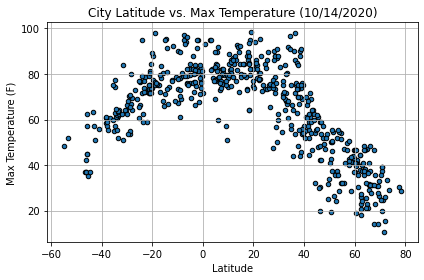

In [142]:
clean_data.plot(kind='scatter', x='Latitude', y='Max Temp', edgecolors='black')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Max Temperature (10/14/2020)')
plt.tight_layout()
plt.grid()
plt.savefig("Output File/City Latitude vs. Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

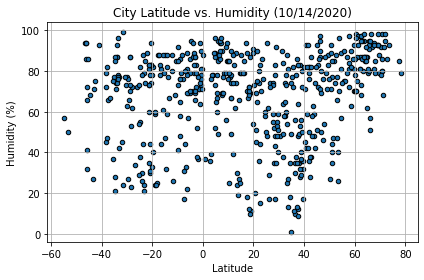

In [143]:
clean_data.plot(kind='scatter', x='Latitude', y='Humidity', edgecolors='black')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity (10/14/2020)')
plt.tight_layout()
plt.grid()
plt.savefig("Output File/City Latitude vs. Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

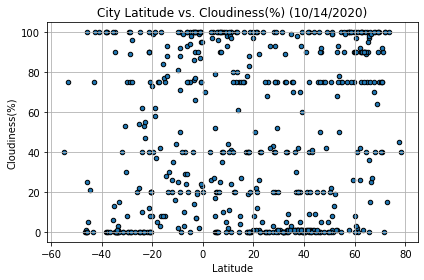

In [144]:
clean_data.plot(kind='scatter', x='Latitude', y='Cloudiness', edgecolors='black')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Cloudiness(%) (10/14/2020)')
plt.tight_layout()
plt.grid()
plt.savefig("Output File/City Latitude vs. Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

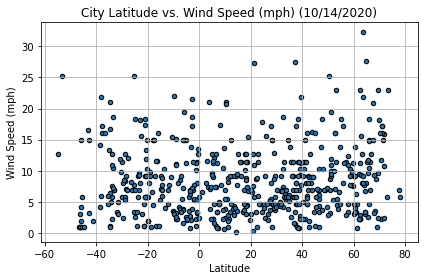

In [145]:
clean_data.plot(kind='scatter', x='Latitude', y='Wind Speed', edgecolors='black')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Wind Speed (mph) (10/14/2020)')
plt.tight_layout()
plt.grid()
plt.savefig("Output File/City Latitude vs. Wind Speed.png")
plt.show()

## Linear Regression

In [146]:
#set up variables
n_lat = clean_data.loc[clean_data['Latitude'] >= 0]
s_lat = clean_data.loc[clean_data['Latitude'] < 0]

n_lat_int = n_lat['Latitude'].astype(int)
s_lat_int = s_lat['Latitude'].astype(int)

ntemp = n_lat['Max Temp'].astype(int)
stemp = s_lat['Max Temp'].astype(int)

ncloud = n_lat['Cloudiness'].astype(int)
scloud = s_lat['Cloudiness'].astype(int)

nwind = n_lat['Wind Speed'].astype(int)
swind = s_lat['Wind Speed'].astype(int)

nhum = n_lat['Humidity'].astype(int).astype(int)
shum = s_lat['Humidity'].astype(int)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared : 0.72, Correlation Coefficient : -0.85


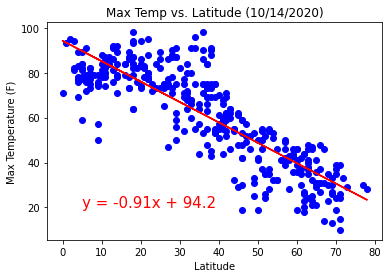

In [147]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_int, ntemp)
regress_values = n_lat_int * slope + intercept


plt.scatter(n_lat_int,ntemp, marker='o', facecolors='blue')
plt.plot(n_lat_int,regress_values,"r-")


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsquared = f"r-squared : {(round(rvalue**2,2))},"
cc = f"Correlation Coefficient : {round(st.pearsonr(n_lat_int, ntemp)[0],2)}"

plt.annotate(line_eq,(5, 20),fontsize=15,color="red")
print(rsquared, cc)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp vs. Latitude (10/14/2020)")

plt.savefig("Output File/Max Temp vs. Latitude North.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared : 0.55, Correlation Coefficient : 0.74


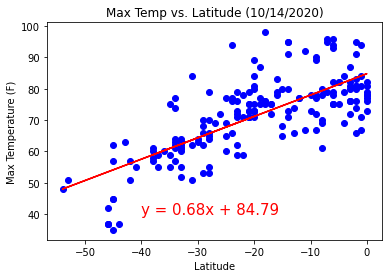

In [148]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_int,stemp)
regress_values = s_lat_int * slope + intercept


plt.scatter(s_lat_int, stemp, marker='o', facecolors='blue')
plt.plot(s_lat_int, regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsquared = f"r-squared : {(round(rvalue**2,2))},"
cc = f"Correlation Coefficient : {round(st.pearsonr(stemp,s_lat_int)[0],2)}"

plt.annotate(line_eq,(-40, 40),fontsize=15,color="red")
print(rsquared, cc)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp vs. Latitude (10/14/2020)")

plt.savefig("Output File/Max Temp vs. Latitude South.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared : 0.06, Correlation Coefficient : 0.24


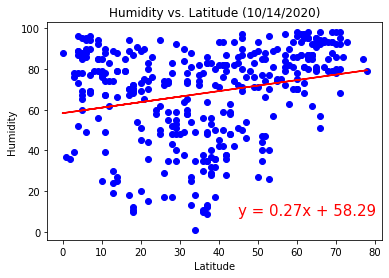

In [149]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_int, nhum)
regress_values = n_lat_int * slope + intercept


plt.scatter(n_lat_int, nhum, marker='o', facecolors='blue')
plt.plot(n_lat_int,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsquared = f"r-squared : {(round(rvalue**2,2))},"
cc = f"Correlation Coefficient : {round(st.pearsonr(n_lat_int, nhum)[0],2)}"

plt.annotate(line_eq,(45, 8),fontsize=15,color="red")
print(rsquared, cc)


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude (10/14/2020)")

plt.savefig("Output File/Max Temp vs. Humidity North.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared : 0.01, Correlation Coefficient : 0.09


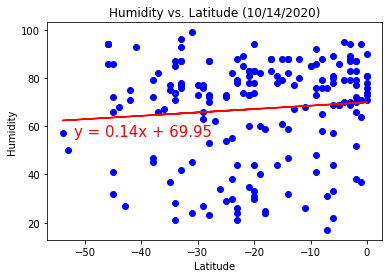

In [150]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_int, shum)
regress_values = s_lat_int * slope + intercept


plt.scatter(s_lat_int, shum, marker='o', facecolors='blue')
plt.plot(s_lat_int, regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsquared = f"r-squared : {(round(rvalue**2,2))},"
cc = f"Correlation Coefficient : {round(st.pearsonr(s_lat_int, shum)[0],2)}"

plt.annotate(line_eq,(-52, 56),fontsize=15,color="red")
print(rsquared, cc)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude (10/14/2020)")

plt.savefig("Output File/Max Temp vs. Humidity South.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared : 0.03, Correlation Coefficient : 0.17


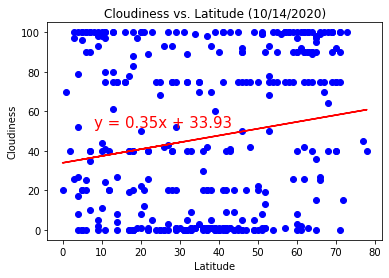

In [151]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_int, ncloud)
regress_values = n_lat_int * slope + intercept


plt.scatter(n_lat_int, ncloud, marker='o', facecolors='blue')
plt.plot(n_lat_int,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsquared = f"r-squared : {(round(rvalue**2,2))},"
cc = f"Correlation Coefficient : {round(st.pearsonr(n_lat_int, ncloud)[0],2)}"

plt.annotate(line_eq,(8, 52),fontsize=15,color="red")
print(rsquared, cc)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude (10/14/2020)")

plt.savefig("Output File/Max Temp vs. Cloudiness North.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared : 0.11, Correlation Coefficient : 0.33


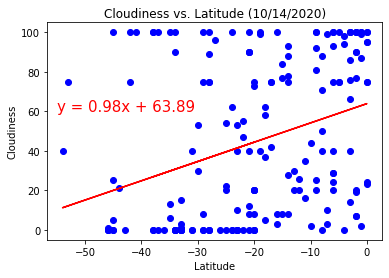

In [152]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_int, scloud)
regress_values = s_lat_int * slope + intercept


plt.scatter(s_lat_int, scloud, marker='o', facecolors='blue')
plt.plot(s_lat_int, regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsquared = f"r-squared : {(round(rvalue**2,2))},"
cc = f"Correlation Coefficient : {round(st.pearsonr(s_lat_int, scloud)[0],2)}"

plt.annotate(line_eq,(-55, 60),fontsize=15,color="red")
print(rsquared, cc)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude (10/14/2020)")

plt.savefig("Output File/Max Temp vs. Cloudiness South.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared : 0.04, Correlation Coefficient : 0.2


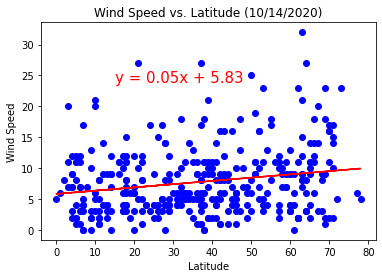

In [153]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_int, nwind)
regress_values = n_lat_int * slope + intercept


plt.scatter(n_lat_int, nwind, marker='o', facecolors='blue')
plt.plot(n_lat_int,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsquared = f"r-squared : {(round(rvalue**2,2))},"
cc = f"Correlation Coefficient : {round(st.pearsonr(n_lat_int, nwind)[0],2)}"

plt.annotate(line_eq,(15, 24),fontsize=15,color="red")
print(rsquared, cc)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude (10/14/2020)")

plt.savefig("Output File/Max Temp vs. Wind Speed North.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared : 0.0, Correlation Coefficient : -0.07


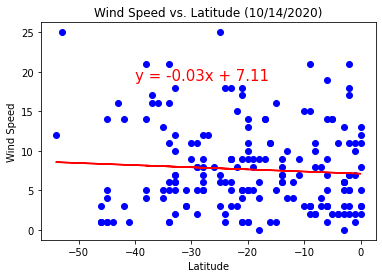

In [154]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_int, swind)
regress_values = s_lat_int * slope + intercept


plt.scatter(s_lat_int, swind, marker='o', facecolors='blue')
plt.plot(s_lat_int, regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsquared = f"r-squared : {(round(rvalue**2,2))},"
cc = f"Correlation Coefficient : {round(st.pearsonr(s_lat_int, swind)[0],2)}"

plt.annotate(line_eq,(-40, 19),fontsize=15,color="red")
print(rsquared, cc)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude (10/14/2020)")

plt.savefig("Output File/Max Temp vs. Wind Speed South.png")

plt.show()